## Libraries

In [101]:
from model import PrintRollModel
import pandas as pd
from datetime import date
import seaborn as sns

## Helper Functions

In [129]:
def transform_to_real_timestamps(df):
    columns = ["created_at", "assigned_at", "entered_print_queue_at", "left_print_queue_at", "printed_at"]
    for column in columns:
        df[column] = TODAY + pd.to_timedelta(df[column],unit="m")
    return df

def generate_date_spine(starting_date, starting_time=0, end_time = 0, increment_by=0):
    if end_time == 0:
        end_time = starting_time *  2
        
    return [starting_date + pd.to_timedelta(x,unit="m") for x in range(starting_time, end_time + increment_by, increment_by)]

def get_queue_over_time(number_of_runs, date_spine, df):
    printers = df["printed_assigned_to"].unique()
    queue_over_time_df = pd.DataFrame(columns=[
                    "sim_id",
                    "date",
                    "printer",
                    "queue_size"
                ])
    
    for run in range(number_of_runs):
        
        for printer in printers:
            # Assuming that at the start time the queues are always empty.
            queue_over_time_df = queue_over_time_df.append(
                    {
                        "sim_id": run,
                        "date": date_spine[0],
                        "printer": printer,
                        "queue_size": pd.to_numeric(0)
                    },
                    ignore_index=True,
                )

        
        for i in range(1, len(date_spine)):
            for printer in printers:
                # Creating a mask to know how the queue was like by time by printer
                temp_df = df[df["sim_id"]==run].copy()
                temp_df = temp_df[temp_df["printed_assigned_to"]==printer]
                mask = (temp_df['entered_print_queue_at'] < date_spine[i-1]) & ((temp_df['left_print_queue_at'] >= date_spine[i]) | (temp_df['left_print_queue_at'].isnull()))                
                queue_over_time_df = queue_over_time_df.append(
                    {
                        "sim_id": run,
                        "date": date_spine[i],
                        "printer": printer,
                        "queue_size": pd.to_numeric(len(temp_df.loc[mask]))
                    },
                    ignore_index=True,
                )

    return queue_over_time_df


## Simulations

In [130]:
NUMBER_OF_RUNS = 1
TODAY = pd.to_datetime(date.today())
# 8:00 AM / 08:00:00
STARTING_TIME = 480
# 5:00 PM / 17:00:00 
END_TIME = 1020
INCREMENT_BY = 30
DATE_SPINE = generate_date_spine(TODAY, STARTING_TIME, END_TIME, INCREMENT_BY)
result_dt = pd.DataFrame()
LOG_OUTPUT = False

In [131]:
for run in range(NUMBER_OF_RUNS):
    if LOG_OUTPUT:
        print(f"Simulation #{run+1} of {NUMBER_OF_RUNS}")
    print_model = PrintRollModel(log_output=LOG_OUTPUT, sim_id=run)
    print_model.run()
    result_dt = result_dt.append(transform_to_real_timestamps(print_model.get_rolls_data()))
    
    if LOG_OUTPUT:
        print("\n\n")

<AxesSubplot:xlabel='date', ylabel='queue_size'>

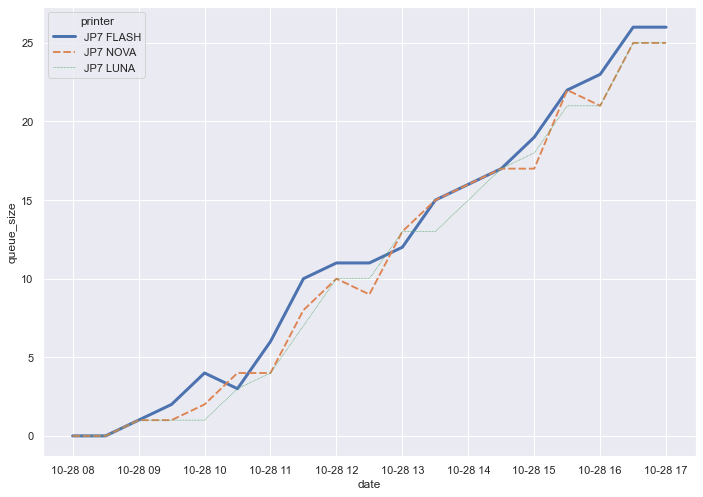

In [136]:
queue_over_time = get_queue_over_time(NUMBER_OF_RUNS, DATE_SPINE, result_dt)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x = queue_over_time["date"], y = pd.to_numeric(queue_over_time["queue_size"]), hue=queue_over_time["printer"], size=queue_over_time["printer"], style=queue_over_time["printer"])

# for printer in queue_over_time["printer"].unique():
#     df = queue_over_time[queue_over_time["printer"]==printer]
#     print(df)
    # create the time series plot
#     sns.lineplot(x = "date", y = "queue_size", data = df)
    
# display(queue_over_time)

In [68]:
mask = (result_dt['entered_print_queue_at'] >=DATE_SPINE[13]) & ((result_dt['left_print_queue_at'] <= DATE_SPINE[14]) | (result_dt['left_print_queue_at'].isnull()))
result_dt.loc[mask]
# result_dt[result_dt["entered_print_queue_at"]


,sim_id,roll_id,created_at,material,assigned_at,entered_print_queue_at,left_print_queue_at,minutes_waiting_in_queue,printed_at,processing_time,printed_assigned_to
66,0,67,2022-10-28 14:30:54.113684400,CHRST,2022-10-28 14:30:54.113684400,2022-10-28 14:30:54.113684400,NaT,None,NaT,None,JP7 LUNA
67,0,68,2022-10-28 14:32:27.173455020,CTFLN,2022-10-28 14:32:27.173455020,2022-10-28 14:32:27.173455020,NaT,None,NaT,None,JP7 NOVA
68,0,69,2022-10-28 14:33:51.179157120,CFT97,2022-10-28 14:33:51.179157120,2022-10-28 14:33:51.179157120,NaT,None,NaT,None,JP7 LUNA
69,0,70,2022-10-28 14:42:32.269467599,CTNL1,2022-10-28 14:42:32.269467599,2022-10-28 14:42:32.269467599,NaT,None,NaT,None,JP7 NOVA
70,0,71,2022-10-28 15:06:20.324912220,CUTWL,2022-10-28 15:06:20.324912220,2022-10-28 15:06:20.324912220,NaT,None,NaT,None,JP7 FLASH
71,0,72,2022-10-28 15:08:48.096662580,LN135,2022-10-28 15:08:48.096662580,2022-10-28 15:08:48.096662580,NaT,None,NaT,None,JP7 FLASH
72,0,73,2022-10-28 15:11:38.475631020,CTNBA,2022-10-28 15:11:38.475631020,2022-10-28 15:11:38.475631020,NaT,None,NaT,None,JP7 LUNA
73,0,74,2022-10-28 15:14:26.833176000,CTSPS,2022-10-28 15:14:26.833176000,2022-10-28 15:14:26.833176000,NaT,None,NaT,None,JP7 LUNA
74,0,75,2022-10-28 15:20:34.599990360,OCTHR,2022-10-28 15:20:34.599990360,2022-10-28 15:20:34.599990360,NaT,None,NaT,None,JP7 LUNA
75,0,76,2022-10-28 15:21:52.094445360,FBTRY,2022-10-28 15:21:52.094445360,2022-10-28 15:21:52.094445360,NaT,None,NaT,None,JP7 LUNA


In [61]:
result_dt

,sim_id,roll_id,created_at,material,assigned_at,entered_print_queue_at,left_print_queue_at,minutes_waiting_in_queue,printed_at,processing_time,printed_assigned_to
0,0,1,2022-10-28 08:00:00.000000000,CFT97,2022-10-28 08:00:00.000000000,2022-10-28 08:00:00.000000000,2022-10-28 08:00:00.000000000,0,2022-10-28 08:51:34.329028500,51.57215,JP7 NOVA
1,0,2,2022-10-28 08:01:06.694012260,CTNOX,2022-10-28 08:01:06.694012260,2022-10-28 08:01:06.694012260,2022-10-28 08:01:06.694012260,0.0,2022-10-28 09:00:11.986575240,59.088209,JP7 FLASH
2,0,3,2022-10-28 08:01:40.551174420,OCTCJ,2022-10-28 08:01:40.551174420,2022-10-28 08:01:40.551174420,2022-10-28 08:51:34.329028500,49.896298,2022-10-28 09:40:22.971201480,48.810703,JP7 NOVA
3,0,4,2022-10-28 08:02:24.740262660,CTFLN,2022-10-28 08:02:24.740262660,2022-10-28 08:02:24.740262660,2022-10-28 09:40:22.971201480,97.970516,2022-10-28 10:27:42.000906540,47.317162,JP7 NOVA
4,0,5,2022-10-28 08:17:20.834394120,CDCBM,2022-10-28 08:17:20.834394120,2022-10-28 08:17:20.834394120,2022-10-28 09:00:11.986575240,42.852536,2022-10-28 09:49:06.796334160,48.913496,JP7 FLASH
...,...,...,...,...,...,...,...,...,...,...,...
83,0,84,2022-10-28 15:41:29.923379460,CTFLN,2022-10-28 15:41:29.923379460,2022-10-28 15:41:29.923379460,NaT,None,NaT,None,JP7 NOVA
84,0,85,2022-10-28 15:44:32.125845780,CT406,2022-10-28 15:44:32.125845780,2022-10-28 15:44:32.125845780,NaT,None,NaT,None,JP7 LUNA
85,0,86,2022-10-28 15:45:49.177931160,HC293,2022-10-28 15:45:49.177931160,2022-10-28 15:45:49.177931160,NaT,None,NaT,None,JP7 FLASH
86,0,87,2022-10-28 15:50:24.329467080,CTF19,2022-10-28 15:50:24.329467080,2022-10-28 15:50:24.329467080,NaT,None,NaT,None,JP7 NOVA
